In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

# Load the dataset
df = pd.read_csv('proteomics.txt', sep='\t', index_col=0)

# Transposing the dataset
# Since I want to cluster the patients (columns) based on their protein expression profiles, I transpose the dataset in order to
# make each column represent a protein, and each row a patient.
df = df.T

# Basic Descriptive Statistics
# print("Descriptive Statistics:\n", df.describe())

# Check for Missing Values
print("\nMissing Values:", df.isnull().sum().sum()) # Missing Values: 0



Missing Values: 0


In [2]:
df.head()

Protein_ID,A1BG,A2M,AAMDC,AARS1,AASDHPPT,AASS,ABAT,ABCC4,ABCE1,ABCF1,...,YWHAE,YWHAG,YWHAH,YWHAQ,YWHAZ,ZADH2,ZFHX3,ZNF185,ZNF207,ZYX
BC.1,1.047640e+09,1.304314e+10,35395800.0,77138600.0,1322772.000,2.149774e+07,1.615196e+07,2294820.000,1.101012e+07,24670800.0,...,2.717220e+09,7.508160e+08,577654000.0,1.149346e+09,7.624540e+09,9.264420e+06,4.984337e+05,1.496858e+07,1.708168e+07,102436400.0
BC.2,1.113700e+09,6.184000e+09,58690000.0,96508000.0,9252077.742,3.165600e+06,8.644212e+06,1917313.735,1.235980e+07,8326600.0,...,1.876420e+09,8.162600e+08,480040000.0,1.047000e+09,6.705200e+09,2.910213e+06,3.593441e+05,4.789986e+05,1.293843e+06,292820000.0
BC.3,1.055760e+09,6.564800e+09,9091800.0,46406000.0,3913600.000,4.620000e+06,4.325549e+06,3463000.000,2.843400e+06,7310400.0,...,1.758920e+09,1.137120e+09,697180000.0,1.359340e+09,8.877000e+09,1.543817e+06,6.227843e+05,3.823402e+05,3.410526e+06,168724000.0
BC.4,1.104000e+09,4.329400e+09,41908000.0,17550000.0,1687937.466,5.226863e+06,7.219093e+06,3200134.601,1.423474e+06,6473600.0,...,1.184080e+09,6.620400e+08,473080000.0,7.363200e+08,3.372000e+09,2.494988e+06,3.323255e+05,4.357254e+05,1.235035e+07,651260000.0
BC.5,1.158380e+09,9.797400e+09,39804000.0,56650000.0,5560375.423,9.672200e+06,8.832000e+06,5298370.284,7.971200e+06,7818800.0,...,2.570000e+09,7.799800e+08,419820000.0,1.485820e+09,7.733800e+09,5.560051e+05,8.482400e+07,4.351219e+05,1.137900e+07,213560000.0


#### Normalization


In [3]:

# Standardizing the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

In [4]:
scaled_data.shape # (140, 3121)

(140, 3121)

## Subpopulation Identification

### clustering patients

#### PCA

In [21]:
# standard pca
# Dimensionality reduction with PCA
pca = PCA(n_components=3)
pca_result = pca.fit_transform(scaled_data)

#### Sparse PCA


In [5]:
# sparse PCA
from sklearn.decomposition import SparsePCA

# Number of components to keep
n_components = 50  #  adjust this number

# Initialize and fit SparsePCA
sparse_pca = SparsePCA(n_components=n_components, random_state=42)
sparse_pca_data = sparse_pca.fit_transform(scaled_data)

# sparse_pca_data now contains the reduced dataset

In [6]:
import joblib

# Save the sparse_pca_data to a file
joblib.dump(sparse_pca_data, 'sparse_pca_data_50.pkl')


['sparse_pca_data_10.pkl']

In [58]:
# Load the sparse_pca_data from the file
sparse_pca_data = joblib.load('sparse_pca_data_50.pkl')


#### K-Means

c:\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super

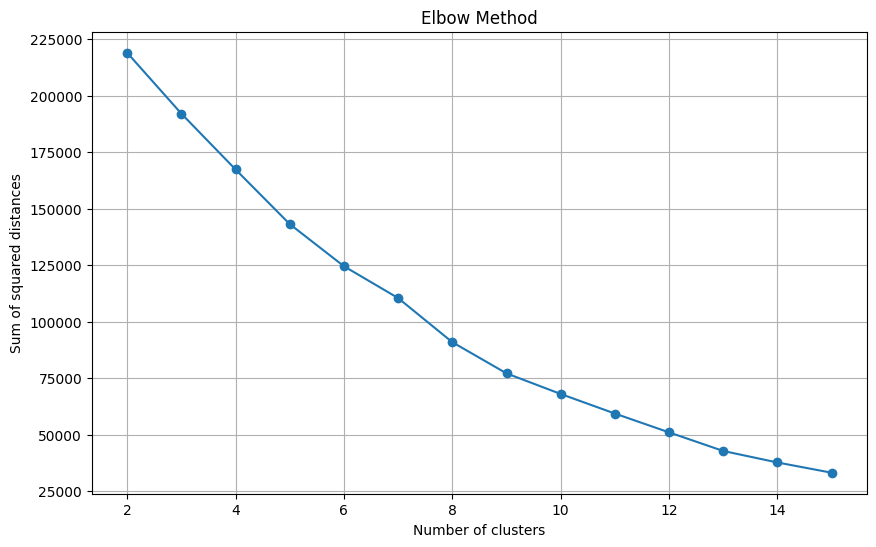

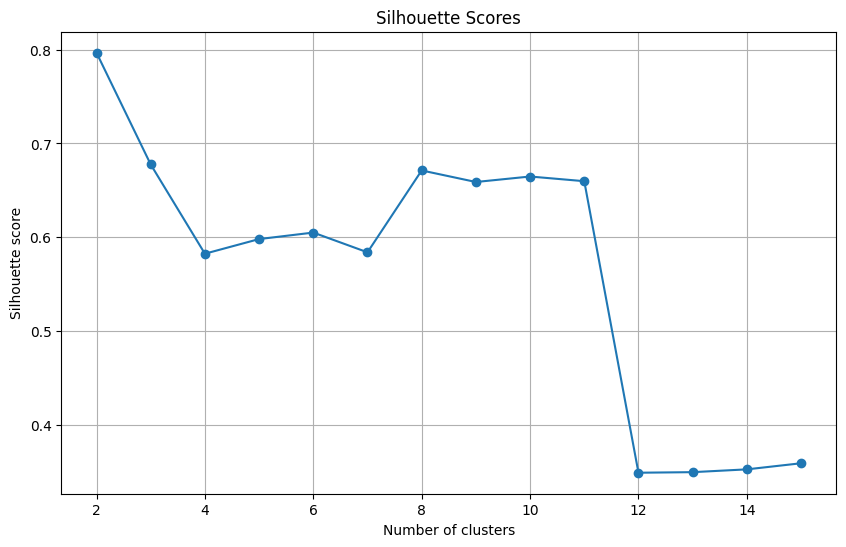

In [7]:
from sklearn.cluster import KMeans

# Assuming a maximum number of clusters you want to test
max_clusters = 15

# Storing Sum of Squared Distances
ssd = []
# Storing Silhouette Scores
silhouette_scores = []

for k in range(2, max_clusters + 1):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(sparse_pca_data)
    
    # Sum of squared distances of samples to their closest cluster center
    ssd.append(kmeans.inertia_)

    # Silhouette Score
    score = silhouette_score(sparse_pca_data, kmeans.labels_)
    silhouette_scores.append(score)

# Plotting the Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(range(2, max_clusters + 1), ssd, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances')
plt.grid(True)
plt.show()

# Plotting the Silhouette Scores
plt.figure(figsize=(10, 6))
plt.plot(range(2, max_clusters + 1), silhouette_scores, marker='o')
plt.title('Silhouette Scores')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.grid(True)
plt.show()


In [8]:
optimal_k = 8  
final_kmeans = KMeans(n_clusters=optimal_k, random_state=42)
final_kmeans.fit(sparse_pca_data)

# Getting the cluster labels
cluster_labels = final_kmeans.labels_

# You can now use cluster_labels for further analysis


c:\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


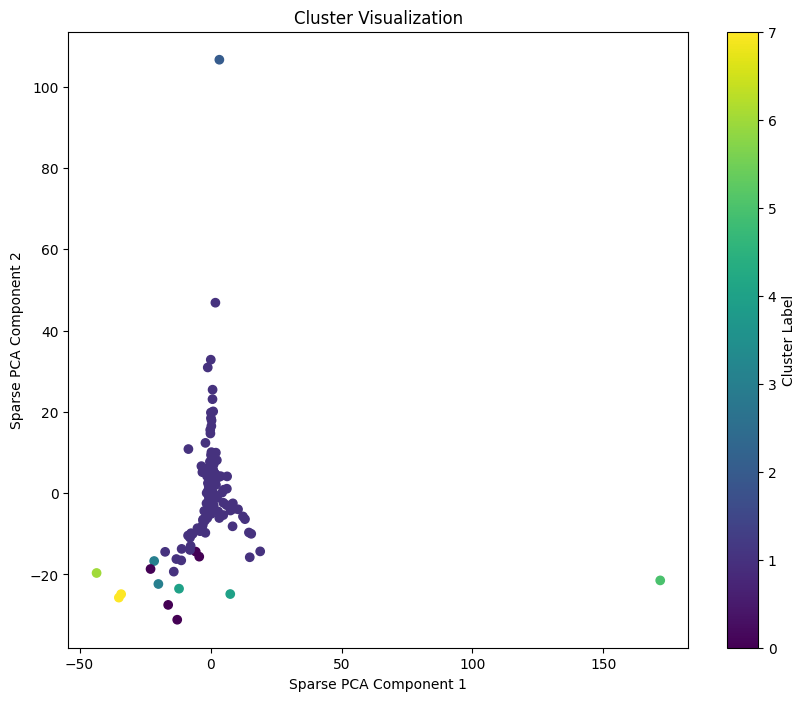

In [9]:
import matplotlib.pyplot as plt

# Assuming you've done a Sparse PCA with at least 2 components
plt.figure(figsize=(10, 8))
plt.scatter(sparse_pca_data[:, 0], sparse_pca_data[:, 1], c=cluster_labels, cmap='viridis')
plt.title('Cluster Visualization')
plt.xlabel('Sparse PCA Component 1')
plt.ylabel('Sparse PCA Component 2')
plt.colorbar(label='Cluster Label')
plt.show()


In [20]:
# Assuming your patients' IDs are in the same order as the clustering labels
patient_ids = df.index  # or use a list of patient IDs if they are not the index

# Create a DataFrame with the cluster assignments
cluster_df = pd.DataFrame({'Protein_ID': patient_ids, 'Cluster': cluster_labels})

# Save to CSV
cluster_df.to_csv('cluster_assignments.csv', index=False)


#### t-SNE


In [10]:
# t-SNE
from sklearn.manifold import TSNE

# Number of components to reduce to (usually 2 for visualization)
n_components = 2

# Initialize and fit t-SNE
tsne = TSNE(n_components=n_components, random_state=42)
tsne_data = tsne.fit_transform(scaled_data)

# tsne_data now contains the 2D representation of the data


In [6]:
# !pip install --user umap-learn


#### UMAP

In [12]:
# UMAP
import umap

# Number of components and nearest neighbors
n_components = 2
n_neighbors = 15  #  adjust this number

# Initialize and fit UMAP
umap_model = umap.UMAP(n_neighbors=n_neighbors, n_components=n_components, random_state=42)
umap_data = umap_model.fit_transform(scaled_data)

# umap_data now contains the 2D representation of the data


c:\Python39\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
C:\Users\sywu_\AppData\Roaming\Python\Python39\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


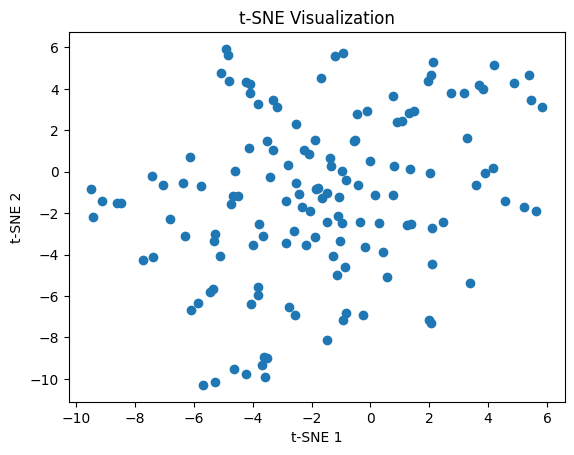

In [11]:
plt.scatter(tsne_data[:, 0], tsne_data[:, 1])
plt.title('t-SNE Visualization')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.show()



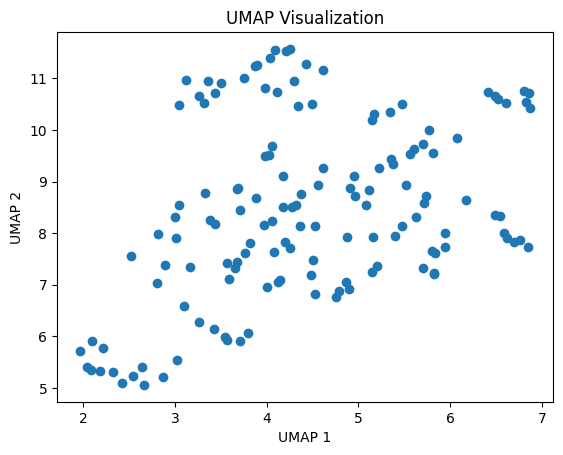

In [13]:
plt.scatter(umap_data[:, 0], umap_data[:, 1])
plt.title('UMAP Visualization')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.show()


#### DBSCAN


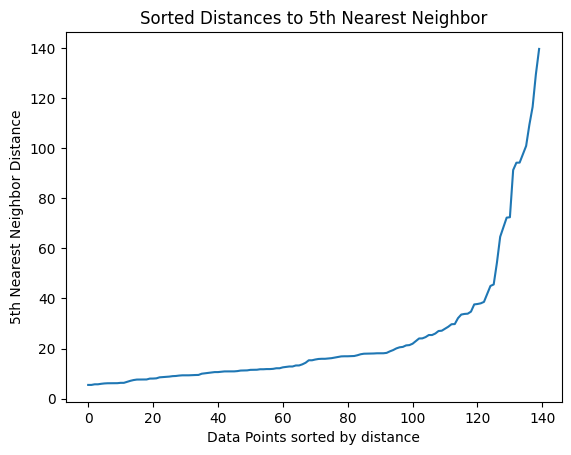

In [26]:
# DBSACAN
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
import numpy as np

# estimate a good value for eps by calculating the distance to the nearest n points for each point
nearest_neighbors = NearestNeighbors(n_neighbors=10)
neighbors = nearest_neighbors.fit(sparse_pca_data)
distances, indices = neighbors.kneighbors(sparse_pca_data)

# Sort the distances and plot them to find the best eps
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
plt.title('Sorted Distances to 5th Nearest Neighbor')
plt.xlabel('Data Points sorted by distance')
plt.ylabel('5th Nearest Neighbor Distance')
plt.show()

Estimated number of clusters: 1
Estimated number of noise points: 2


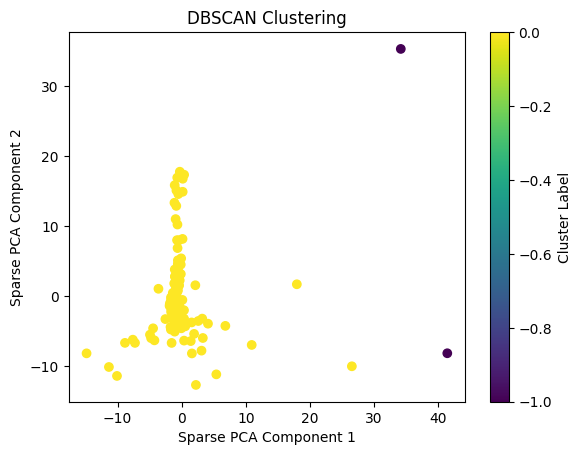

In [28]:


# decide on an eps value based on the plot
eps_value = 120  # Replace with the value chosen from the plot

# Apply DBSCAN with the chosen eps and a minimum samples value
dbscan = DBSCAN(eps=eps_value, min_samples=10)
db_labels = dbscan.fit_predict(sparse_pca_data)

# Check how many clusters were found
n_clusters_ = len(set(db_labels)) - (1 if -1 in db_labels else 0)
n_noise_ = list(db_labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

# Plot the clusters
plt.scatter(sparse_pca_data[:, 0], sparse_pca_data[:, 1], c=db_labels, cmap='viridis', marker='o')
plt.title('DBSCAN Clustering')
plt.xlabel('Sparse PCA Component 1')
plt.ylabel('Sparse PCA Component 2')
plt.colorbar(label='Cluster Label')
plt.show()


#### GMM


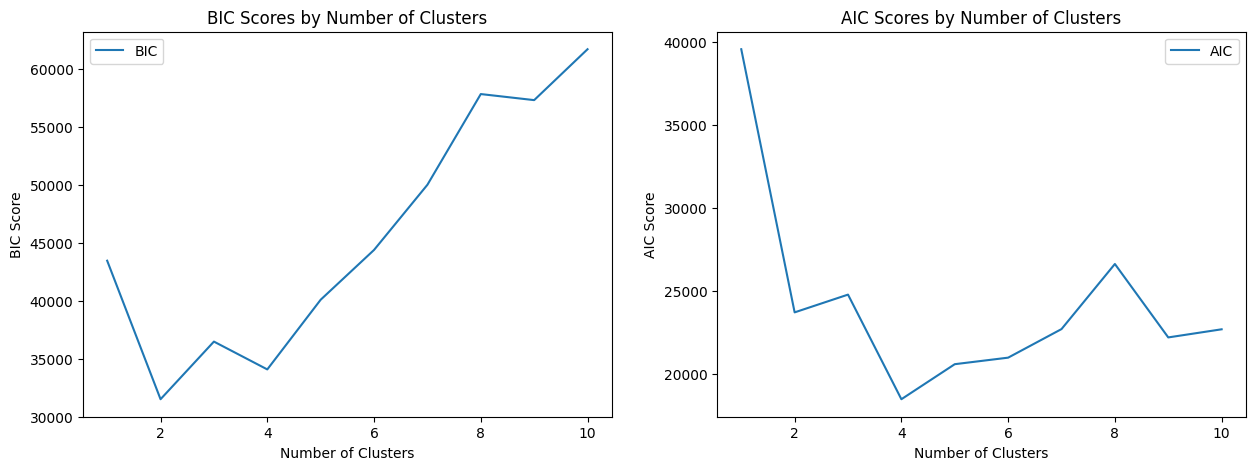

In [66]:
# GMM
# use sparse n=50 data
from sklearn.mixture import GaussianMixture
# Choose a range of cluster numbers to evaluate
n_components_range = range(1, 11)
bics = []
aics = []

for n_components in n_components_range:
    gmm = GaussianMixture(n_components=n_components, random_state=42)
    gmm.fit(sparse_pca_data)
    bics.append(gmm.bic(sparse_pca_data))
    aics.append(gmm.aic(sparse_pca_data))

# Plot the BIC and AIC scores
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(n_components_range, bics, label='BIC')
plt.title('BIC Scores by Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('BIC Score')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(n_components_range, aics, label='AIC')
plt.title('AIC Scores by Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('AIC Score')
plt.legend()

plt.show()


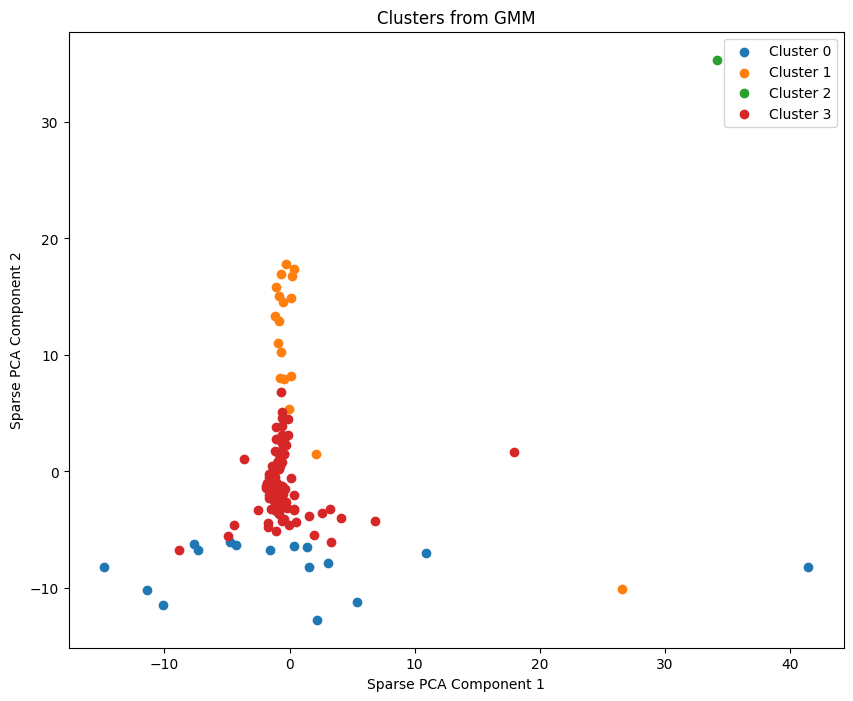

In [86]:


import numpy as np

# Choose the number of components/clusters
n_components = 4

# Initialize the GMM
gmm = GaussianMixture(n_components=n_components, random_state=42)

# Fit the GMM model to the data
gmm.fit(sparse_pca_data)

# Predict the cluster for each data point
gmm_labels = gmm.predict(sparse_pca_data)

# Probabilities of each data point to belong to each cluster
gmm_probs = gmm.predict_proba(sparse_pca_data)

# Visualize the clusters
plt.figure(figsize=(10, 8))
for i in range(n_components):
    plt.scatter(sparse_pca_data[gmm_labels == i, 0], sparse_pca_data[gmm_labels == i, 1], label=f'Cluster {i}')
plt.title('Clusters from GMM')
plt.xlabel('Sparse PCA Component 1')
plt.ylabel('Sparse PCA Component 2')
plt.legend()
plt.show()


In [77]:

# Assuming you have a list or array of protein or patient IDs that match the order of your sparse_pca_data
protein_ids = patient_ids = df.index

# Create a DataFrame with the IDs and the GMM cluster labels
cluster_assignments_df = pd.DataFrame({
    'Protein_ID': protein_ids,
    'Cluster': gmm_labels
})

# Save the DataFrame to a CSV file
cluster_assignments_df.to_csv('cluster_assignments.csv', index=False)


### Identifying the correct number of patient subpopulations

Considering the above GMM clustering, although the n_components is set to 4, but cluster2(indicated by green dot) is more likely an outlier, so we think the correct number of patient subpopulations is 3.

## Feature Selection

In [87]:
from sklearn.feature_selection import f_classif, mutual_info_classif


#### Remove outlier

by looking at `cluster_assignment.csv`, the patient BC.1 belongs to cluster 2. 

In [88]:
# Filter out the outliers (cluster 2)
non_outlier_mask = (gmm_labels != 2)
df_filtered = df[non_outlier_mask]
gmm_labels_filtered = gmm_labels[non_outlier_mask]

#### ANOVA & Mutual Information

In [89]:
# Perform ANOVA F-test
f_values, p_values = f_classif(df_filtered, gmm_labels_filtered)
# Perform Mutual Information
mi_scores = mutual_info_classif(df_filtered, gmm_labels_filtered)

# Create a DataFrame for the feature scores
feature_scores = pd.DataFrame({
    'Feature': df_filtered.columns,
    'ANOVA F-value': f_values,
    'ANOVA p-value': p_values,
    'Mutual Information': mi_scores
})

# Sort the features by ANOVA F-value 
feature_scores.sort_values(by='ANOVA F-value', ascending=False, inplace=True)

# choose a method to select the top features:
# Select a p-value threshold for ANOVA
significant_features_anova = feature_scores[feature_scores['ANOVA p-value'] < 0.05]


In [90]:
significant_features_anova

,Feature,ANOVA F-value,ANOVA p-value,Mutual Information
242,ARSA,205.433154,8.030199e-42,0.635493
655,CTBP2,203.168392,1.413675e-41,0.580534
2475,S100A12,193.689323,1.589124e-40,0.627146
2087,PODN,191.711911,2.661700e-40,0.615615
1018,FKBP11,184.165710,1.976769e-39,0.553346
...,...,...,...,...
985,FBLN2,3.088299,4.879031e-02,0.080070
2806,TAX1BP3,3.081253,4.912030e-02,0.071510
465,CDC37,3.081138,4.912570e-02,0.195313
1455,ITGA6,3.080054,4.917668e-02,0.077843


In [93]:

# sort by Mutual Information
feature_scores.sort_values(by='Mutual Information', ascending=False, inplace=True)

# Or select the top N features by Mutual Information
top_n = 100
significant_features_mi = feature_scores.nlargest(top_n, 'Mutual Information')

In [94]:
significant_features_mi

,Feature,ANOVA F-value,ANOVA p-value,Mutual Information
1024,FKBP5,151.716553,2.311731e-35,0.640212
242,ARSA,205.433154,8.030199e-42,0.635493
2475,S100A12,193.689323,1.589124e-40,0.627146
2632,SLFN5,165.617638,3.566345e-37,0.622175
2087,PODN,191.711911,2.661700e-40,0.615615
...,...,...,...,...
1542,LIMS2,98.152167,4.132353e-27,0.457256
1887,NT5E,67.831546,3.686059e-21,0.453737
1860,NNMT,76.662837,5.085475e-23,0.452948
2523,SDSL,91.540336,6.537504e-26,0.447200


In [95]:
# Save the significant features from ANOVA to a CSV file
significant_features_anova.to_csv('significant_features_anova.csv', index=False)

# Save the top features from Mutual Information to a CSV file
significant_features_mi.to_csv('significant_features_mi.csv', index=False)


In [96]:
# Find the intersection of features significant in both ANOVA and Mutual Information
combined_significant_features = significant_features_anova[significant_features_anova['Feature'].isin(significant_features_mi['Feature'])]

# Save the combined significant features to a CSV file
combined_significant_features.to_csv('combined_significant_features.csv', index=False)

# all in...

### Identifying the correct number of feature